# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

We suppose that the pdf follows a Gaussian law, and we suppose that the distributiof classes follows the uniform law, in other words :
\begin{equation*}
P(a)=\frac{card(a)}{(card(a)+card(b)+card(c))}
\end{equation*}
\begin{equation*}
    P(x|a)=\frac{1}{(2\pi)^\frac{1}{2}|\Sigma_a|^\frac{1}{2}}exp(-\frac{1}{2}(x-\mu_a)^T\Sigma_a^{-1}(x-\mu_a))
\end{equation*}

We can then build a Bayesian classifier that uses the argmax of the discriminant for each class.

Parameters for class a :
Mean: [-0.  0.]
Sigma: [[10.  0.]
 [ 0.  1.]]
Parameters for class b :
Mean: [3. 3.]
Sigma: [[10.  0.]
 [ 0.  1.]]
Parameters for class c :
Mean: [-10.   0.]
Sigma: [[1. 0.]
 [0. 5.]]


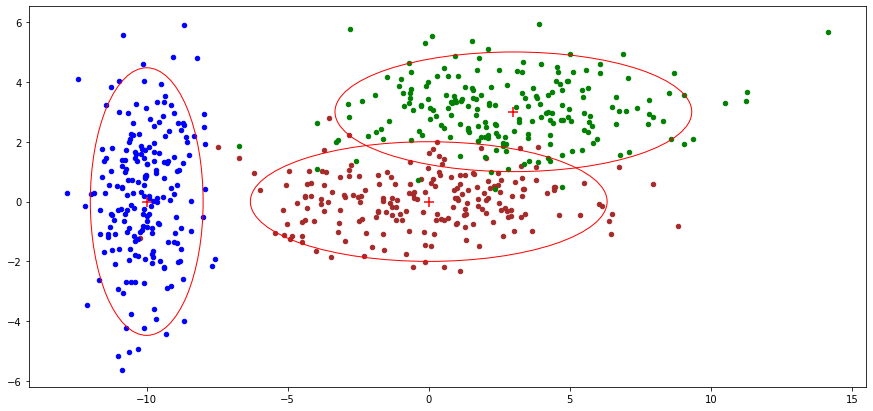

In [35]:
# Plotting the three classes on a 2D space
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def compute_params(x):
    return np.round(np.mean(x, axis=0)), np.round(np.cov(x, rowvar=False))

def confidence_ellipse(mean, cov, ax):

    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)

    ell = Ellipse(xy=(mean[0], mean[1]),
                  width=lambda_[0]*2*2, height=lambda_[1]*2*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), color='red')
    ell.set_facecolor('none')
    ax.add_artist(ell)
    

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for name, x, col in [('a', a, 'brown'), ('b', b, 'green') , ('c', c, 'blue')]:
    mean, cov = compute_params(x)
    print('Parameters for class', name, ':')
    print('Mean:', mean)
    print('Sigma:', cov)

    confidence_ellipse(mean, cov, ax)
    plt.scatter(x[:, 0], x[:, 1], s=20, c=col)
    plt.scatter(mean[0], mean[1], s=100, c='red', marker='+')

plt.show()

In [6]:
# Building the Discrimint function
def g_di(x,mean,cov,prior=1/3):
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)
    arr = np.array(x-mean)
    return -1/2 * arr.T.dot(cov_inv).dot(arr) + np.log(prior) + np.log(2*np.pi*np.sqrt(cov_det))

In [19]:
import numpy as np
import sympy as sym

# Defining real vector
x = sym.Symbol('x')
y = sym.Symbol('y')
X = np.array([x,y])

# Mean of the two classes
mu_a=np.array([np.mean(a[0,:]),np.mean(a[1,:])])
mu_b=np.array([np.mean(b[0,:]),np.mean(b[1,:])])
mu_c=np.array([np.mean(c[0,:]),np.mean(c[1,:])])

# Probabilty of each class
p_a=len(a)/(len(a)+len(b)+len(c))
p_b=len(b)/(len(a)+len(b)+len(c))
p_c=len(c)/(len(a)+len(b)+len(c))

# Verifying if Sigma is identical for the two classes taking few points into account
Sigma_a=np.cov(a.transpose())
Sigma_b=np.cov(b.transpose())
Sigma_c=np.cov(c.transpose())

# Discriminant function of the three classes
g_a=g_di(X,mu_a,Sigma_a,p_a)
g_b=g_di(X,mu_b,Sigma_b,p_b)
g_c=g_di(X,mu_c,Sigma_c,p_c)

print("The disicriminant function of the class a: \n",g_a)
print("The disicriminant function of the class b: \n",g_b)
print("The disicriminant function of the class c: \n",g_c)


The disicriminant function of the class a: 
 -0.5*(x - 2.48007946534122)*(0.099929488488715*x - 0.0156709597012291*y - 0.258893845085676) - 0.5*(y + 0.705813358826694)*(-0.0156709597012291*x + 1.19388866276494*y + 0.881527792488439) + 1.80333239449327
The disicriminant function of the class b: 
 -0.5*(x - 0.229102757687433)*(0.0986156343917377*x - 0.0163968575498282*y + 0.0180488208970604) - 0.5*(y - 2.47864168873804)*(-0.0163968575498282*x + 0.925232300357835*y - 2.28956278615185) + 1.93785821635509
The disicriminant function of the class c: 
 -0.5*(x + 4.39964427757011)*(1.04338818045364*x - 0.0521034383560349*y + 4.40264729175552) - 0.5*(y + 3.60608726774864)*(-0.0521034383560349*x + 0.215478226088591*y + 0.547796693170276) + 1.49155003850817


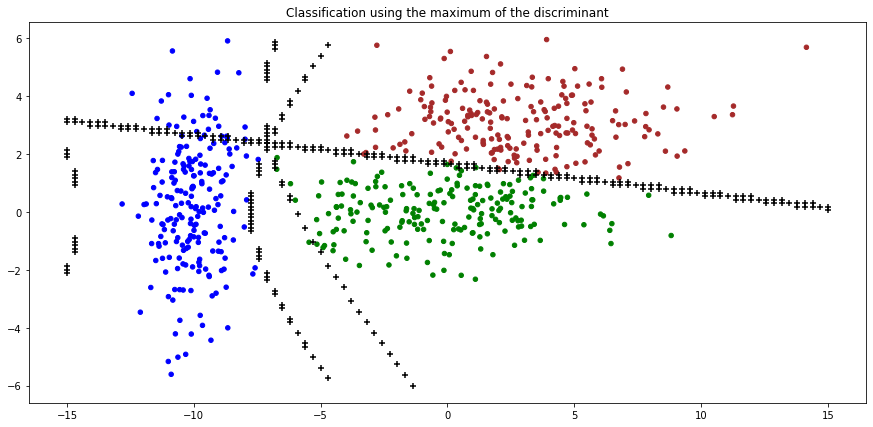

In [28]:
mean, cov = compute_params(a)
to_draw_ab = []
to_draw_ac = []
to_draw_bc = []

xv, yv = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-6, 6, 100))

g = []
for i in [a, b, c]:
    mean, cov = compute_params(i)
    g.append(lambda X, mean=mean, cov=cov: g_di(X, mean, cov))

for x, y in zip(xv.flatten(), yv.flatten()):
    
    X = np.array([x, y])
        
    epsilon = 0.3
    if abs(g[0](X) - g[1](X)) < epsilon:
        to_draw_ab.append([x, y])
    if abs(g[0](X) - g[2](X)) < epsilon:
        to_draw_ac.append([x, y])
    if abs(g[1](X) - g[2](X)) < epsilon:
        to_draw_bc.append([x, y])

to_draw_ab = np.array(to_draw_ab)
to_draw_ac = np.array(to_draw_ac)
to_draw_bc = np.array(to_draw_bc)

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for points in [a, b, c]:
    class_to_col = {0: 'green', 1: 'brown', 2: 'blue'}
    classes = [np.argmax([g_i([x, y]) for g_i in g]) for x, y in points]
    plt.scatter(points[:, 0], points[:, 1], s=20, c=[class_to_col[c] for c in classes])

plt.scatter(to_draw_ab[:, 0], to_draw_ab[:, 1], c='black', marker='+')
plt.scatter(to_draw_ac[:, 0], to_draw_ac[:, 1], c='black', marker='+')
plt.scatter(to_draw_bc[:, 0], to_draw_bc[:, 1], c='black', marker='+')

plt.title('Classification using the maximum of the discriminant')

plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

Here we do the classification by taking the argmin of the Mahalanobis distance. The result is exactly the same as for the Bayesian classification since the prior is uniform and the constant can be neglected.

In [12]:
# Mahalanobis distance power 2 we couldn't get the distance because we use symbols of x and y
def mah2(x,mu,sigma):
    v=np.array(x-mu)
    sigma_inv=np.linalg.inv(sigma)
    return(v.dot(sigma_inv.dot(v)))

The egality of the two sigmas is : False
The covarince matrix of a is :
 [[10.02769733  0.13162336]
 [ 0.13162336  0.83932673]]
The covarince matrix of b is :
 [[10.17034812  0.18023771]
 [ 0.18023771  1.0840038 ]]
The distance power 2 of class a (x - 2.48007946534122)*(0.099929488488715*x - 0.0156709597012291*y - 0.258893845085676) + (y + 0.705813358826694)*(-0.0156709597012291*x + 1.19388866276494*y + 0.881527792488439)
The distance power 2 of class b (x - 0.229102757687433)*(0.0986156343917377*x - 0.0163968575498282*y + 0.0180488208970604) + (y - 2.47864168873804)*(-0.0163968575498282*x + 0.925232300357835*y - 2.28956278615185)


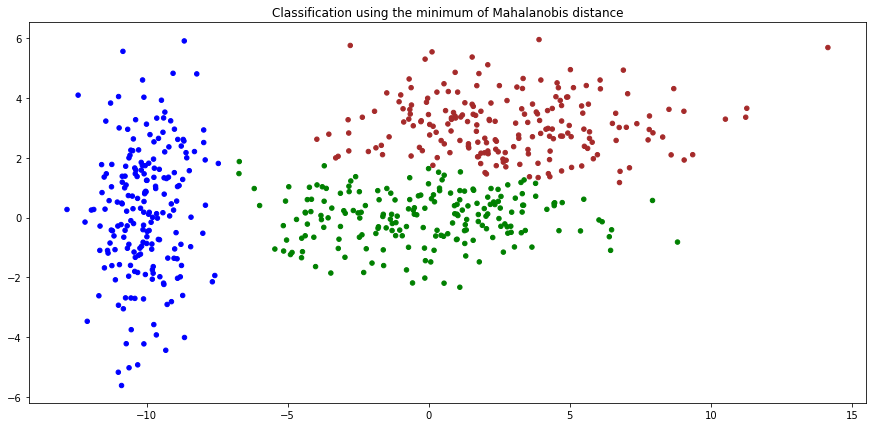

In [29]:
import scipy.spatial.distance as sd
# Mean of the two classes
mu_a=np.array([np.mean(a[0,:]),np.mean(a[1,:])])
mu_b=np.array([np.mean(b[0,:]),np.mean(b[1,:])])


# Defining real vector
x = sym.Symbol('x')
y = sym.Symbol('y')
X = np.array([x,y])

# Verifying if Sigma is identical for the two classes taking few points into account
Sigma_a=np.cov(a.transpose())
Sigma_b=np.cov(b.transpose())
print("The egality of the two sigmas is :",len(np.where((Sigma_a==Sigma_b)==False))==0)
print("The covarince matrix of a is :\n",Sigma_a)
print("The covarince matrix of b is :\n",Sigma_b)

# Mahalanobis distance power 2
d_a_mahalanobis=mah2(X,mu_a,Sigma_a)
d_b_mahalanobis=mah2(X,mu_b,Sigma_b)
print("The distance power 2 of class a",d_a_mahalanobis)
print("The distance power 2 of class b",d_b_mahalanobis)

d = []
for i in [a, b, c]:
    mean, cov = compute_params(i)
    d.append(lambda X, mean=mean, cov=cov: mah2(X, mean, cov))

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for points in [a, b, c]:
    class_to_col = {0: 'green', 1: 'brown', 2: 'blue'}
    classes = [np.argmin([d_i([x, y]) for d_i in d]) for x, y in points]
    plt.scatter(points[:, 0], points[:, 1], s=20, c=[class_to_col[c] for c in classes])
    
plt.title('Classification using the minimum of Mahalanobis distance')
plt.show()

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [7]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [8]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

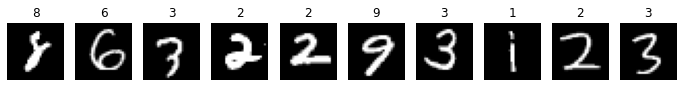

In [9]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
Here we try to use a one layer neural network to classify the digits of the MNIST dataset. We built two models with a similar structure but we tried to add a relu activation function in the Dense layer of the second model.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import numpy as np

Using TensorFlow backend.


In [13]:
num_classes = 10

x_train = train_images.reshape(train_images.shape[0], 28*28)
x_test = test_images.reshape(test_images.shape[0], 28*28)
y_train = train_labels
y_test = test_labels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [14]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size = 60
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3157 - accuracy: 0.9119 - val_loss: 0.1835 - val_accuracy: 0.9451
Epoch 2/20
 - 3s - loss: 0.1471 - accuracy: 0.9574 - val_loss: 0.1251 - val_accuracy: 0.9628
Epoch 3/20
 - 3s - loss: 0.1040 - accuracy: 0.9697 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 4/20
 - 3s - loss: 0.0799 - accuracy: 0.9761 - val_loss: 0.0905 - val_accuracy: 0.9716
Epoch 5/20
 - 3s - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.0833 - val_accuracy: 0.9742
Epoch 6/20
 - 3s - loss: 0.0525 - accuracy: 0.9847 - val_loss: 0.0806 - val_accuracy: 0.9744
Epoch 7/20
 - 3s - loss: 0.0423 - accuracy: 0.9875 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 8/20
 - 3s - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 9/20
 - 3s - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0791 - val_accuracy: 0.9765
Epoch 10/20
 - 3s - loss: 0.0256 - accuracy: 0.9926 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 11/20
 - 3s -

In [18]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3138 - accuracy: 0.9123 - val_loss: 0.1791 - val_accuracy: 0.9451
Epoch 2/20
 - 3s - loss: 0.1460 - accuracy: 0.9571 - val_loss: 0.1206 - val_accuracy: 0.9637
Epoch 3/20
 - 3s - loss: 0.1037 - accuracy: 0.9694 - val_loss: 0.1022 - val_accuracy: 0.9684
Epoch 4/20
 - 3s - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 5/20
 - 3s - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.0816 - val_accuracy: 0.9736
Epoch 6/20
 - 3s - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0742 - val_accuracy: 0.9764
Epoch 7/20
 - 3s - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0750 - val_accuracy: 0.9752
Epoch 8/20
 - 3s - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0748 - val_accuracy: 0.9767
Epoch 9/20
 - 3s - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.0764 - val_accuracy: 0.9761
Epoch 10/20
 - 3s - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0815 - val_accuracy: 0.9753
Epoch 11/20
 - 3s -